In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [2]:
odf = pd.read_csv('2May2022-whole-val-preds-old.csv')
ydf = pd.read_csv('2May2022-whole-val-preds-young.csv')

In [3]:
odf.head()

,input,pred,label
0,in the red one,the red one,no any red one
1,you have a people,I have a people,I have people
2,ow,ow,ow
3,oh they're outside,they're outside,outside
4,yes he's gonna try to hide,he's trying to hide,try to hide


In [4]:
ydf.head()

,input,pred,label
0,lost,lost,lost
1,hop,hop,hop
2,colors,colors,colors
3,you want a bicycle,I want a bicycle,I want a bicycle
4,watch Pippin,watch Pippin,watch Pippin


# Utterance lengths (input, preds, targets)

It looks like the predictions are on average shorter than the inputs -- but interestingly enough, also shorter than the target predictions??

## Old partition

In [5]:
for col in ['input', 'pred', 'label']:
    odf[f'{col}_len'] = [len(x.split()) for x in odf[col]]
odf.head()

,input,pred,label,input_len,pred_len,label_len
0,in the red one,the red one,no any red one,4,3,4
1,you have a people,I have a people,I have people,4,4,3
2,ow,ow,ow,1,1,1
3,oh they're outside,they're outside,outside,3,2,1
4,yes he's gonna try to hide,he's trying to hide,try to hide,6,4,3


In [20]:
print(odf['input_len'].mean())
print(odf['pred_len'].mean())
print(odf['label_len'].mean())

3.416923177680267
2.7657999869015653
3.2909162355098567


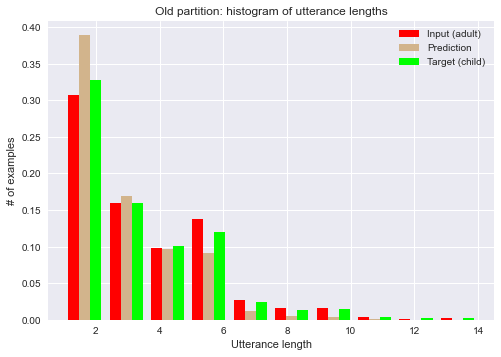

In [45]:
hist_data = np.concatenate((odf['input_len'].values.reshape(-1, 1), 
                            odf['pred_len'].values.reshape(-1, 1), 
                            odf['label_len'].values.reshape(-1, 1)), axis=1)
hist_data.shape

colors = ['red', 'tan', 'lime']
labels = ['Input (adult)', 'Prediction', 'Target (child)']
plt.hist(hist_data, density=True, histtype='bar', color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.title('Old partition: histogram of utterance lengths')
# odf['input_len'].hist(alpha=0.2, legend=True)
# odf['pred_len'].hist(alpha=0.2, legend=True)
# odf['label_len'].hist(alpha=0.2, legend=True)
plt.xlabel('Utterance length')
_ = plt.ylabel('# of examples')

## Young partition

In [21]:
for col in ['input', 'pred', 'label']:
    ydf[f'{col}_len'] = [len(x.split()) for x in ydf[col]]
ydf.head()

,input,pred,label,input_len,pred_len,label_len
0,lost,lost,lost,1,1,1
1,hop,hop,hop,1,1,1
2,colors,colors,colors,1,1,1
3,you want a bicycle,I want a bicycle,I want a bicycle,4,4,4
4,watch Pippin,watch Pippin,watch Pippin,2,2,2


In [33]:
print('Input mean length:', ydf['input_len'].mean())
print('Prediction mean length:', ydf['pred_len'].mean())
print('Target mean length:', ydf['label_len'].mean())

Input mean length: 2.821089827041101
Prediction mean length: 2.26334387204761
Target mean length: 2.370373814394644


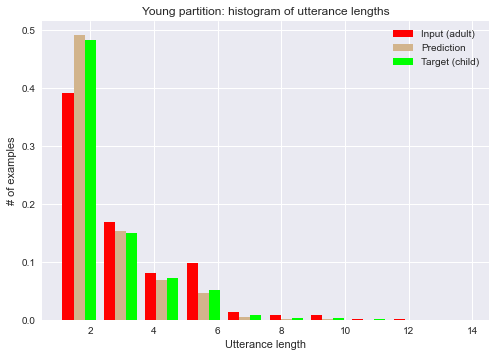

In [46]:
hist_data = np.concatenate((ydf['input_len'].values.reshape(-1, 1), 
                            ydf['pred_len'].values.reshape(-1, 1), 
                            ydf['label_len'].values.reshape(-1, 1)), axis=1)
hist_data.shape

colors = ['red', 'tan', 'lime']
labels = ['Input (adult)', 'Prediction', 'Target (child)']
plt.hist(hist_data, density=True, histtype='bar', color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.title('Young partition: histogram of utterance lengths')
# odf['input_len'].hist(alpha=0.2, legend=True)
# odf['pred_len'].hist(alpha=0.2, legend=True)
# odf['label_len'].hist(alpha=0.2, legend=True)
plt.xlabel('Utterance length')
_ = plt.ylabel('# of examples')

## Young vs. old: comparing true child utterance lengths

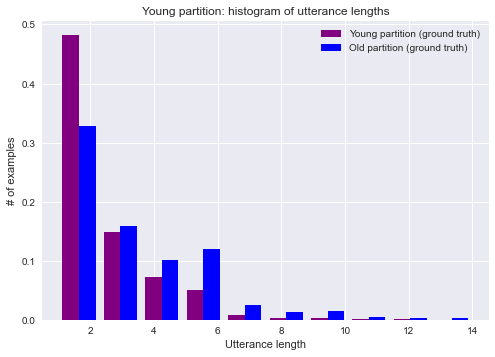

In [50]:
hist_data = [ydf['label_len'].values, odf['label_len'].values]
colors = ['purple', 'blue']
labels = ['Young partition (ground truth)', 'Old partition (ground truth)']
plt.hist(hist_data, density=True, histtype='bar', color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.title('Young partition: histogram of utterance lengths')
# odf['input_len'].hist(alpha=0.2, legend=True)
# odf['pred_len'].hist(alpha=0.2, legend=True)
# odf['label_len'].hist(alpha=0.2, legend=True)
plt.xlabel('Utterance length')
_ = plt.ylabel('# of examples')

## Young vs. old: comparing prediction child utterance lengths

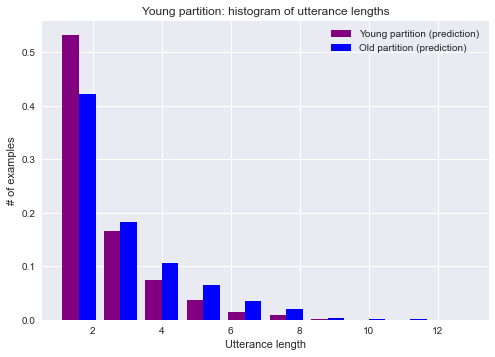

In [51]:
hist_data = [ydf['pred_len'].values, odf['pred_len'].values]
colors = ['purple', 'blue']
labels = ['Young partition (prediction)', 'Old partition (prediction)']
plt.hist(hist_data, density=True, histtype='bar', color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.title('Young partition: histogram of utterance lengths')
# odf['input_len'].hist(alpha=0.2, legend=True)
# odf['pred_len'].hist(alpha=0.2, legend=True)
# odf['label_len'].hist(alpha=0.2, legend=True)
plt.xlabel('Utterance length')
_ = plt.ylabel('# of examples')

# Determiners (input, preds, targets)

Using determiner list from https://en.wikipedia.org/wiki/List_of_English_determiners.

In [54]:
DETERMINERS = {'a',
'a few',
'a little',
'all',
'an',
'another',
'any',
'anybody',
'anyone',
'anything',
'anywhere',
'both',
'certain',
'each',
'either',
'enough',
'every',
'everybody',
'everyone',
'everything',
'everywhere',
'few',
'fewer',
'fewest',
'last',
'least',
'less',
'little',
'many',
'many a',
'more',
'most',
'much',
'neither',
'next',
'no',
'no one',
'nobody',
'none',
'nothing',
'nowhere',
'once',
'one',
'said',
'several',
'some',
'somebody',
'something',
'somewhere',
'sufficient',
'that',
'the',
'these',
'this',
'those',
'three',
'thrice',
'twice',
'two',
'us',
'various',
'we',
'what',
'whatever',
'which',
'whichever',
'you',
'zero'}

In [62]:
def determiner_count(utterance):
    return sum(int(x in DETERMINERS) for x in utterance.split())

## Old partition

In [57]:
for col in ['input', 'pred', 'label']:
    odf[f'{col}_determiner_count'] = [determiner_count(utt) for utt in odf[col]]
odf['input_label_determiner_diff'] = odf['label_determiner_count'] - odf['input_determiner_count']
odf['input_pred_determiner_diff'] = odf['pred_determiner_count'] - odf['input_determiner_count']
odf.head()

,input,pred,label,input_len,pred_len,label_len,input_determiner_count,pred_determiner_count,label_determiner_count,input_label_determiner_diff,input_pred_determiner_diff
0,in the red one,the red one,no any red one,4,3,4,2,2,3,1,0
1,you have a people,I have a people,I have people,4,4,3,2,1,0,-2,-1
2,ow,ow,ow,1,1,1,0,0,0,0,0
3,oh they're outside,they're outside,outside,3,2,1,0,0,0,0,0
4,yes he's gonna try to hide,he's trying to hide,try to hide,6,4,3,0,0,0,0,0


In [92]:
odf['input_determiner_count'].mean()

0.7238849957430087

In [93]:
odf['pred_determiner_count'].mean()

0.5006221756500098

In [94]:
odf['label_determiner_count'].mean()

0.6042307944200668

In [91]:
print('determiner diff between labels - inputs:', odf['input_label_determiner_diff'].mean())

print('determiner diff between preds - inputs:', odf['input_pred_determiner_diff'].mean())

determiner diff between labels - inputs: -0.11965420132294191
determiner diff between preds - inputs: -0.2232628200929989


## Young partition

In [63]:
for col in ['input', 'pred', 'label']:
    ydf[f'{col}_determiner_count'] = [determiner_count(utt) for utt in ydf[col]]
ydf['input_label_determiner_diff'] = ydf['label_determiner_count'] - ydf['input_determiner_count']
ydf['input_pred_determiner_diff'] = ydf['pred_determiner_count'] - ydf['input_determiner_count']
ydf.head()

,input,pred,label,input_len,pred_len,label_len,input_determiner_count,pred_determiner_count,label_determiner_count,input_label_determiner_diff,input_pred_determiner_diff
0,lost,lost,lost,1,1,1,0,0,0,0,0
1,hop,hop,hop,1,1,1,0,0,0,0,0
2,colors,colors,colors,1,1,1,0,0,0,0,0
3,you want a bicycle,I want a bicycle,I want a bicycle,4,4,4,2,1,1,-1,-1
4,watch Pippin,watch Pippin,watch Pippin,2,2,2,0,0,0,0,0


In [66]:
print('determiner diff between inputs, labels:', ydf['input_label_determiner_diff'].mean())

print('determiner diff between inputs, preds:', ydf['input_pred_determiner_diff'].mean())

determiner diff between inputs, labels: -0.13548447089455087
determiner diff between inputs, preds: -0.17100613725125535


# Pronoun reversal 

## Old partition

In [70]:
FIRSTPERSON_PRONOUNS = {'i', 'me', 'my', 'mine', 'myself'}
SECONDPERSON_PRONOUNS = {'you', 'your', 'yours', 'yourself', 'yourselves'}

In [71]:
def firstperson_pronoun_count(utterance):
    return sum(int(x.lower() in FIRSTPERSON_PRONOUNS) for x in utterance.split())

def secondperson_pronoun_count(utterance):
    return sum(int(x.lower() in SECONDPERSON_PRONOUNS) for x in utterance.split())

In [72]:
for col in ['input', 'pred', 'label']:
    odf[f'{col}_1person_pronoun_count'] = [firstperson_pronoun_count(utt) for utt in odf[col]]
    odf[f'{col}_2person_pronoun_count'] = [secondperson_pronoun_count(utt) for utt in odf[col]]

odf['has_true_pronoun_reversal'] = ((odf['input_1person_pronoun_count'] > 0) & (odf['label_2person_pronoun_count'] > 0) |
                                    (odf['input_2person_pronoun_count'] > 0) & (odf['label_1person_pronoun_count'] > 0))
odf['has_pred_pronoun_reversal'] = ((odf['input_1person_pronoun_count'] > 0) & (odf['pred_2person_pronoun_count'] > 0) |
                                    (odf['input_2person_pronoun_count'] > 0) & (odf['pred_1person_pronoun_count'] > 0))
odf.head()

,input,pred,label,input_len,pred_len,label_len,input_determiner_count,pred_determiner_count,label_determiner_count,input_label_determiner_diff,input_pred_determiner_diff,input_1person_pronoun_count,input_2person_pronoun_count,pred_1person_pronoun_count,pred_2person_pronoun_count,label_1person_pronoun_count,label_2person_pronoun_count,has_true_pronoun_reversal,has_pred_pronoun_reversal
0,in the red one,the red one,no any red one,4,3,4,2,2,3,1,0,0,0,0,0,0,0,False,False
1,you have a people,I have a people,I have people,4,4,3,2,1,0,-2,-1,0,1,1,0,1,0,True,True
2,ow,ow,ow,1,1,1,0,0,0,0,0,0,0,0,0,0,0,False,False
3,oh they're outside,they're outside,outside,3,2,1,0,0,0,0,0,0,0,0,0,0,0,False,False
4,yes he's gonna try to hide,he's trying to hide,try to hide,6,4,3,0,0,0,0,0,0,0,0,0,0,0,False,False


In [78]:
print('Proportion of examples w/ predicted pronoun reversal:', odf['has_pred_pronoun_reversal'].mean())
print('Proportion of examples w/ true pronoun reversal:', odf['has_true_pronoun_reversal'].mean())

Proportion of examples w/ predicted pronoun reversal: 0.14460671949702011
Proportion of examples w/ true pronoun reversal: 0.11369441351758465


In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision of pronoun reversal:', precision_score(odf['has_true_pronoun_reversal'], odf['has_pred_pronoun_reversal']))
print('Recall of pronoun reversal:', recall_score(odf['has_true_pronoun_reversal'], odf['has_pred_pronoun_reversal']))
print('F1 of pronoun reversal:', f1_score(odf['has_true_pronoun_reversal'], odf['has_pred_pronoun_reversal']))   

Precision of pronoun reversal: 0.6666666666666666
Recall of pronoun reversal: 0.847926267281106
F1 of pronoun reversal: 0.7464503042596349


In [96]:
odf[odf['has_pred_pronoun_reversal'] &
    ~odf['has_true_pronoun_reversal']].sample(10, random_state=42)

,input,pred,label,input_len,pred_len,label_len,input_determiner_count,pred_determiner_count,label_determiner_count,input_label_determiner_diff,input_pred_determiner_diff,input_1person_pronoun_count,input_2person_pronoun_count,pred_1person_pronoun_count,pred_2person_pronoun_count,label_1person_pronoun_count,label_2person_pronoun_count,has_true_pronoun_reversal,has_pred_pronoun_reversal
13869,you can't get those shoes off,I can't get these shoes off,take his shoe off,6,6,4,2,1,0,-2,-1,0,1,1,0,0,0,False,True
742,you lost the potty,I lost the potty,you lost the potty,4,4,4,2,1,2,0,-1,0,1,1,0,0,1,False,True
11175,you be the baby,I be the baby,Mummy you be the baby,4,4,5,2,1,2,0,-1,0,1,1,0,0,1,False,True
4044,catch you,catch me,catch you,2,2,2,1,0,1,0,-1,0,1,1,0,0,1,False,True
5213,your other telephone,where's my other telephone,what telephone,3,4,2,0,0,1,1,0,0,1,1,0,0,0,False,True
12007,me do again,you do again,do again momma,3,3,3,0,1,0,0,1,1,0,0,1,0,0,False,True
909,I didn't hear it,did you hear it,I didn't hear it,4,4,4,0,1,0,0,1,1,0,0,1,1,0,False,True
11206,and you know what when I saw doctor fright he ...,when you saw doctor fright he went oh Spider_Man,he freeze when he saw doctor fright,13,9,7,2,1,0,-2,-1,1,1,0,1,0,0,False,True
12035,where's your money box,where my money box,where's that where's the money box,4,4,6,0,0,2,2,0,0,1,1,0,0,0,False,True
12656,you can have a biscuit,can I have a biscuit,Nicole want a biscuit,5,5,4,2,1,1,-1,-1,0,1,1,0,0,0,False,True


## Young partition

In [82]:
for col in ['input', 'pred', 'label']:
    ydf[f'{col}_1person_pronoun_count'] = [firstperson_pronoun_count(utt) for utt in ydf[col]]
    ydf[f'{col}_2person_pronoun_count'] = [secondperson_pronoun_count(utt) for utt in ydf[col]]

ydf['has_true_pronoun_reversal'] = ((ydf['input_1person_pronoun_count'] > 0) & (ydf['label_2person_pronoun_count'] > 0) |
                                    (ydf['input_2person_pronoun_count'] > 0) & (ydf['label_1person_pronoun_count'] > 0))
ydf['has_pred_pronoun_reversal'] = ((ydf['input_1person_pronoun_count'] > 0) & (ydf['pred_2person_pronoun_count'] > 0) |
                                    (ydf['input_2person_pronoun_count'] > 0) & (ydf['pred_1person_pronoun_count'] > 0))
ydf.head()

,input,pred,label,input_len,pred_len,label_len,input_determiner_count,pred_determiner_count,label_determiner_count,input_label_determiner_diff,input_pred_determiner_diff,input_1person_pronoun_count,input_2person_pronoun_count,pred_1person_pronoun_count,pred_2person_pronoun_count,label_1person_pronoun_count,label_2person_pronoun_count,has_true_pronoun_reversal,has_pred_pronoun_reversal
0,lost,lost,lost,1,1,1,0,0,0,0,0,0,0,0,0,0,0,False,False
1,hop,hop,hop,1,1,1,0,0,0,0,0,0,0,0,0,0,0,False,False
2,colors,colors,colors,1,1,1,0,0,0,0,0,0,0,0,0,0,0,False,False
3,you want a bicycle,I want a bicycle,I want a bicycle,4,4,4,2,1,1,-1,-1,0,1,1,0,1,0,True,True
4,watch Pippin,watch Pippin,watch Pippin,2,2,2,0,0,0,0,0,0,0,0,0,0,0,False,False


In [83]:
print('Proportion of examples w/ predicted pronoun reversal:', ydf['has_pred_pronoun_reversal'].mean())
print('Proportion of examples w/ true pronoun reversal:', ydf['has_true_pronoun_reversal'].mean())

Proportion of examples w/ predicted pronoun reversal: 0.08833922261484099
Proportion of examples w/ true pronoun reversal: 0.053747442811976937


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision of pronoun reversal:', precision_score(ydf['has_true_pronoun_reversal'], ydf['has_pred_pronoun_reversal']))
print('Recall of pronoun reversal:', recall_score(ydf['has_true_pronoun_reversal'], ydf['has_pred_pronoun_reversal']))
print('F1 of pronoun reversal:', f1_score(ydf['has_true_pronoun_reversal'], ydf['has_pred_pronoun_reversal']))   

Precision of pronoun reversal: 0.5210526315789473
Recall of pronoun reversal: 0.856401384083045
F1 of pronoun reversal: 0.6479057591623036


In [95]:
ydf[ydf['has_pred_pronoun_reversal'] & 
    ~ydf['has_true_pronoun_reversal']].sample(10, random_state=42)

,input,pred,label,input_len,pred_len,label_len,input_determiner_count,pred_determiner_count,label_determiner_count,input_label_determiner_diff,input_pred_determiner_diff,input_1person_pronoun_count,input_2person_pronoun_count,pred_1person_pronoun_count,pred_2person_pronoun_count,label_1person_pronoun_count,label_2person_pronoun_count,has_true_pronoun_reversal,has_pred_pronoun_reversal
7401,did you go down the slide,I went down the slide,down the slide,6,5,3,2,1,1,-1,-1,0,1,1,0,0,0,False,True
810,you are,I am,you are,2,2,2,1,0,1,0,-1,0,1,1,0,0,1,False,True
9516,your knee was behind the letters yeah,my knee was behind the letters,yyy knee behind the letters,7,6,5,1,1,1,0,0,0,1,1,0,0,0,False,True
9993,you wanna zip it okay,I wanna zip it,wanna zip it,5,4,3,1,0,0,-1,-1,0,1,1,0,0,0,False,True
3684,did you do it,I did it,did it,4,3,2,1,0,0,-1,-1,0,1,1,0,0,0,False,True
6423,can I have the elephant then,can you have the elephant,can't elephant,6,5,2,1,2,0,-1,1,1,0,0,1,0,0,False,True
6195,you played doggie,I played doggie,doggie,3,3,1,1,0,0,-1,-1,0,1,1,0,0,0,False,True
2328,you need another tissue,I need another tissue,need another one another tissue,4,4,5,2,1,3,1,-1,0,1,1,0,0,0,False,True
9676,oh you wanna drink the vegetables,I wanna drink the vegetables,drink vegetables,6,5,2,2,1,0,-2,-1,0,1,1,0,0,0,False,True
666,you don't want it,I don't want it,want it,4,4,2,1,0,0,-1,-1,0,1,1,0,0,0,False,True


In [90]:
odf.to_csv('old_partition_with_uttlen_pronoun_determiner_stats.csv', index=False)
ydf.to_csv('young_partition_with_uttlen_pronoun_determiner_stats.csv', index=False)